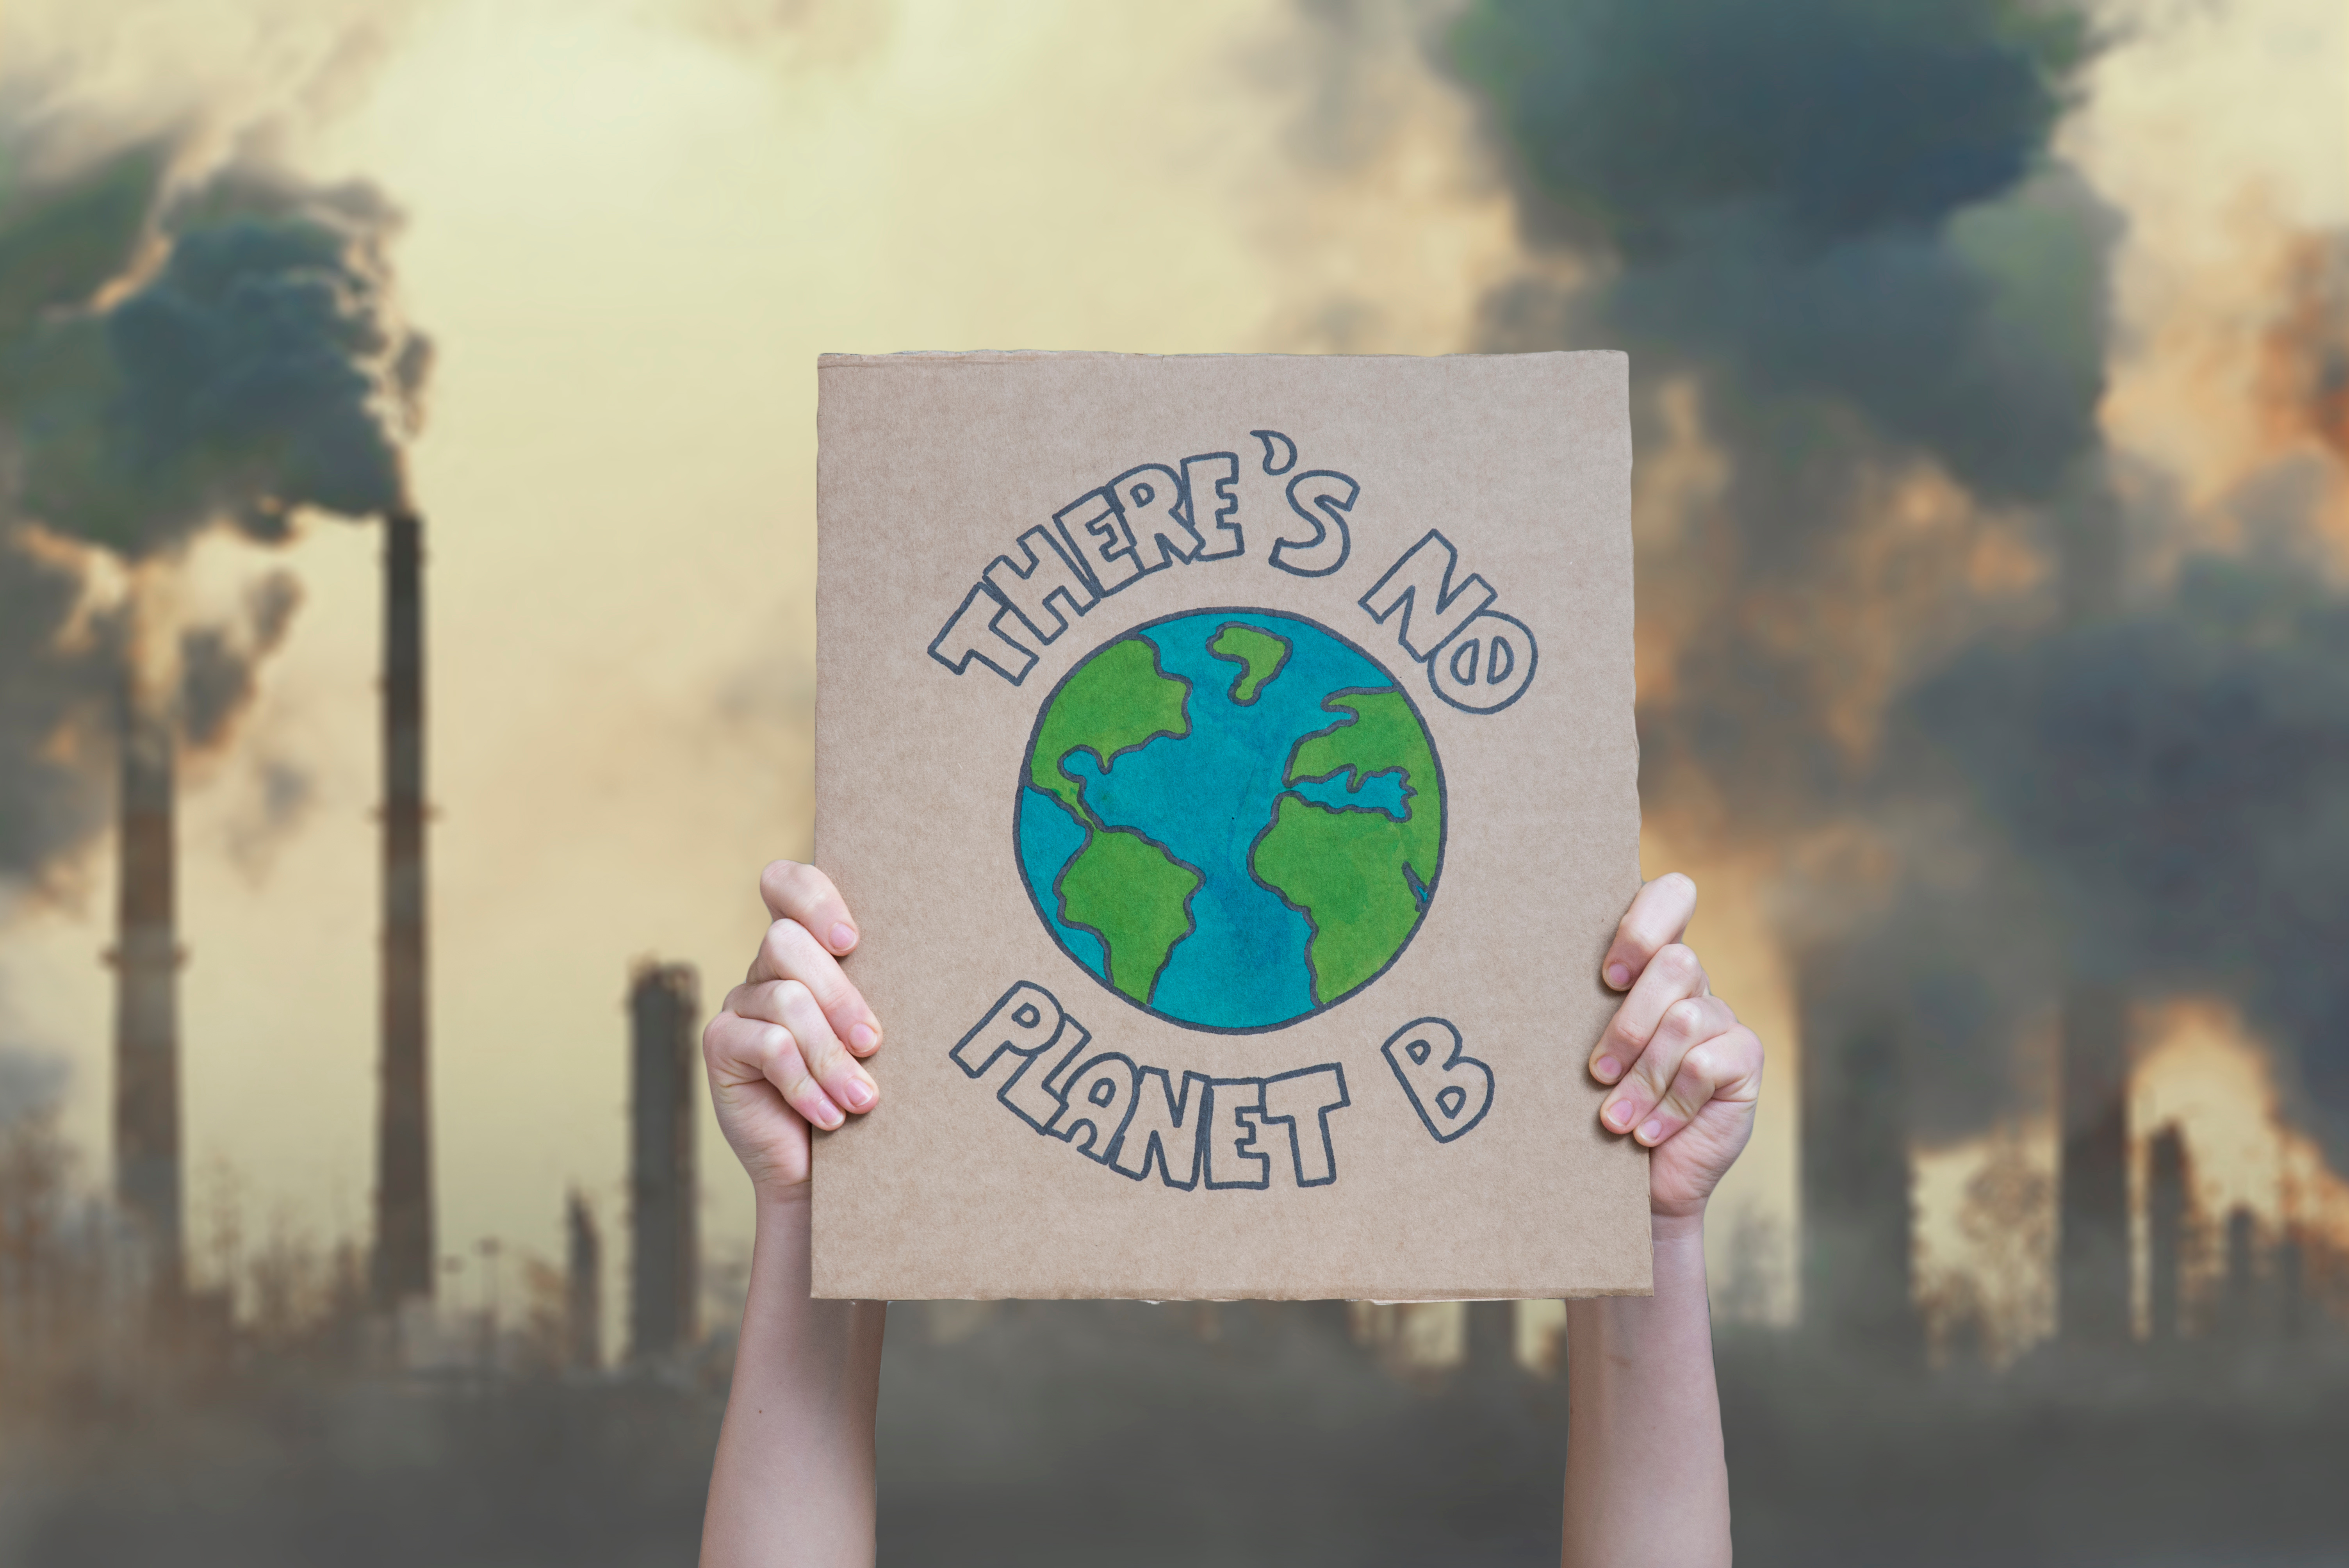

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import datetime
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.subplots import make_subplots
import time
import warnings
warnings.filterwarnings('ignore')



In [2]:
weather = pd.read_csv("1900.csv", index_col="DATE")
data= pd.read_csv("GlobalTemperatures.csv")
data.head()


dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [3]:
weather.head()

STATION                NAME  LATITUDE  LONGITUDE  ELEVATION  \
DATE                                                                          
1909-01-07  EGE00147728  CAIRO EZBEKIYA, EG     30.05      31.25       20.0   
1909-01-08  EGE00147728  CAIRO EZBEKIYA, EG     30.05      31.25       20.0   
1909-01-09  EGE00147728  CAIRO EZBEKIYA, EG     30.05      31.25       20.0   
1909-01-10  EGE00147728  CAIRO EZBEKIYA, EG     30.05      31.25       20.0   
1909-01-11  EGE00147728  CAIRO EZBEKIYA, EG     30.05      31.25       20.0   

            PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  TMAX TMAX_ATTRIBUTES  \
DATE                                                                           
1909-01-07  0.12             ,,E   NaN             NaN   NaN             NaN   
1909-01-08  0.00             ,,E   NaN             NaN  57.0             ,,E   
1909-01-09  0.00             ,,E   NaN             NaN  64.0             ,,E   
1909-01-10  0.00             ,,E   NaN             NaN  52.0             ,,E   
1909-01-11  0.00             ,,E   NaN             NaN  70.0             ,,E   

            TMIN TMIN_ATTRIBUTES  
DATE                              
1909-01-07   NaN             NaN  
1909-01-08   NaN             NaN  
1909-01-09  39.0             ,,E  
1909-01-10  37.0             ,,E  
1909-01-11  43.0             ,,E

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [5]:
# Make a copy of the data for future graphs
copy = data.copy()

In [6]:
# Handling Missing values
data.isna().sum() 

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [7]:
# there are 1200 missing values for Max, Min and Land&Ocean Average Temp

In [8]:
# Missing data with listwise deletion
# Because data is missing in chucks and we are dealing with time series data, we will delete all rows that have at least 
# one missing value.

data.dropna(axis = 0, inplace = True)


In [9]:
# Dealing with the DATE
data['Date'] = pd.to_datetime(data.dt) # converted all dates to the same format


In [10]:
data2 = data.copy() # create a new dataset
data2.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column


In [11]:
# Creating new features
data2['day'] = data2['Date'].dt.day
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

In [12]:
# For future analysis, we will work only on yearly data, as average (because there are dates missing and data is not consistent)
earth_data = data2.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

In [13]:
# creating a new columns
earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after') 
earth_data.head(2)

year  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1850                7.900667                           0.876417   
1  1851                8.178583                           0.881917   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0           13.476667                       2.394833            1.964333   
1           13.081000                       2.397250            2.203917   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                       1.571167                       14.867167   
1                       1.632417                       14.991833   

   LandAndOceanAverageTemperatureUncertainty turnpoint  
0                                   0.308167    before  
1                                   0.312083    before

In [14]:
# Simple Summary Statistics
earth_data[['LandAverageTemperature', 'LandMaxTemperature', 
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
count              166.000000          166.000000          166.000000   
mean                 8.571583           14.350601            2.743595   
std                  0.473687            0.447741            0.614124   
min                  7.558583           13.081000            1.525083   
25%                  8.195708           14.055917            2.262562   
50%                  8.540750           14.307708            2.734917   
75%                  8.791250           14.539167            3.126833   
max                  9.831000           15.572667            4.148833   

       LandAndOceanAverageTemperature  
count                      166.000000  
mean                        15.212566  
std                          0.298629  
min                         14.740083  
25%                         14.991208  
50%                         15.144208  
75%                         15.379104  
max                         16.058583

In [15]:
# Creating the dataset - using copy
copy['Date'] = pd.to_datetime(copy.dt)
copy['year'] = copy['Date'].dt.year


In [16]:
land_avg = copy.groupby('year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']].mean().reset_index()

In [17]:
# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2010", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')
fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))
fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))


In [18]:
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')



fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)

fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(220,0,0)'), row = 1, col = 1)



fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)


fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)

In [19]:
# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Figure data
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)

fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(220,0,0)'), row = 1, col = 1)

fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 1)

fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)

fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 2)


fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 1)

fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)

fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 2)

In [20]:
# Change in average temperature before/after 1975

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Average Temperatures before and after 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

# Figure data
fig.add_trace(go.Box(x = earth_data['LandAverageTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Land Avg Temp'),
             row = 1, col = 1)
fig.add_trace(go.Box(x = earth_data['LandMinTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Land Min Temp'),
             row = 1, col = 2)
fig.add_trace(go.Box(x = earth_data['LandMaxTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Land Max Temp'),
             row = 2, col = 1)
fig.add_trace(go.Box(x = earth_data['LandAndOceanAverageTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, name = 'Land&Ocean Avg Temp'),
             row = 2, col = 2)


fig.update_traces(orientation='h')

In [21]:
# Read the file (countries + cities)
countries = pd.read_csv("GlobalLandTemperaturesByCity.csv")


In [22]:
countries.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [23]:
# Because the file is very big and there are many dates missing (like the last file), we will group by year
# create column year
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year

In [24]:
countries.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude       Date  year  
0  Denmark   57.05N    10.33E 1743-11-01  1743  
1  Denmark   57.05N    10.33E 1743-12-01  1743  
2  Denmark   57.05N    10.33E 1744-01-01  1744  
3  Denmark   57.05N    10.33E 1744-02-01  1744  
4  Denmark   57.05N    10.33E 1744-03-01  1744

In [25]:
# Group by year
by_year = countries.groupby(by=['year', 'City', 'Country', 'Latitude', 'Longitude'])

In [26]:
# Append the continent & iso codes
continent_map = pd.read_csv("continents2.csv")


In [27]:
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]


In [28]:
continent_map.head()

Country   region alpha-2 alpha-3
0     Afghanistan     Asia      AF     AFG
1   Åland Islands   Europe      AX     ALA
2         Albania   Europe      AL     ALB
3         Algeria   Africa      DZ     DZA
4  American Samoa  Oceania      AS     ASM

In [29]:
countries.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude       Date  year  
0  Denmark   57.05N    10.33E 1743-11-01  1743  
1  Denmark   57.05N    10.33E 1743-12-01  1743  
2  Denmark   57.05N    10.33E 1744-01-01  1744  
3  Denmark   57.05N    10.33E 1744-02-01  1744  
4  Denmark   57.05N    10.33E 1744-03-01  1744

In [30]:
by_year_df = by_year.agg('first').reset_index()
data = pd.merge(left=by_year_df, right=continent_map, on='Country', how='left')


In [31]:
# Filter starting 1825 - because some countries weren't monitored before this year on some periods, 
# the mean overall could be quite misleading (example: Americas have an increase from 1821 to 1825 of 5 points in temperature,
# but this happens only because in 1824 data for South America started to be collected)
data = data[data['year'] >= 1825]

In [32]:
# Datasets:

region = data.dropna(axis = 0).groupby(by = ['region', 'year'])
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year'])
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude'])

In [33]:
region.head()

year      City         Country Latitude Longitude          dt  \
83246   1825  A Coruña           Spain   42.59N     8.73W  1825-01-01   
83247   1825    Aachen         Germany   50.63N     6.34E  1825-01-01   
83248   1825   Aalborg         Denmark   57.05N    10.33E  1825-01-01   
83250   1825    Abakan          Russia   53.84N    91.36E  1825-01-01   
83251   1825  Aberdeen  United Kingdom   57.05N     1.48W  1825-01-01   
...      ...       ...             ...      ...       ...         ...   
714849  2013  Adelaide       Australia   34.56S   138.16E  2013-01-01   
714886  2013    Albury       Australia   36.17S   147.18E  2013-01-01   
715007  2013  Auckland     New Zealand   36.17S   175.03E  2013-01-01   
715271  2013  Brisbane       Australia   28.13S   153.64E  2013-01-01   
715325  2013    Cairns       Australia   16.87S   145.67E  2013-01-01   

        AverageTemperature  AverageTemperatureUncertainty       Date   region  \
83246                8.497                          1.971 1825-01-01   Europe   
83247                1.843                          2.873 1825-01-01   Europe   
83248                2.625                          3.640 1825-01-01   Europe   
83250              -18.950                          2.715 1825-01-01   Europe   
83251                5.896                          3.277 1825-01-01   Europe   
...                    ...                            ...        ...      ...   
714849              22.795                          0.297 2013-01-01  Oceania   
714886              23.614                          0.139 2013-01-01  Oceania   
715007              19.290                          0.455 2013-01-01  Oceania   
715271              24.509                          0.298 2013-01-01  Oceania   
715325              26.764                          0.275 2013-01-01  Oceania   

       alpha-2 alpha-3  
83246       ES     ESP  
83247       DE     DEU  
83248       DK     DNK  
83250       RU     RUS  
83251       GB     GBR  
...        ...     ...  
714849      AU     AUS  
714886      AU     AUS  
715007      NZ     NZL  
715271      AU     AUS  
715325      AU     AUS  

[4645 rows x 12 columns]

In [34]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [35]:
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [36]:
countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


In [37]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

In [38]:
layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

In [39]:

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [40]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))

[Text(0.5, 0, 'Average temperature'),
 Text(0.5, 1.0, 'Average land temperature in countries')]

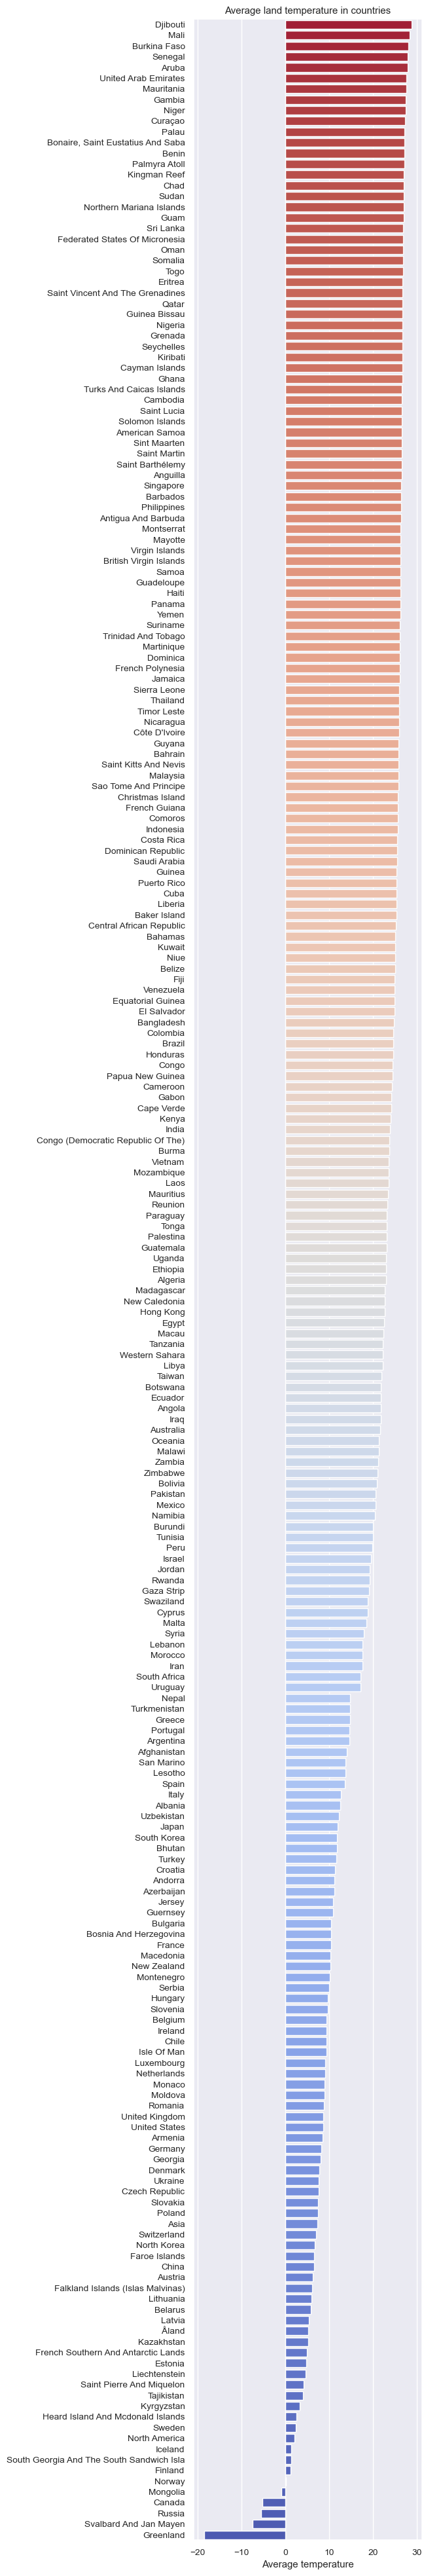

In [41]:

sns.set(font_scale=0.9)
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(x=mean_temp_bar, y=countries_bar, palette=colors_cw[::-1])
ax.set(xlabel='Average temperature', title='Average land temperature in countries')

In [42]:
global_temp = pd.read_csv("GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [43]:
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Djibouti','Egypt']
mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)','rgb(200, 0, 0)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on the continents',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

In [44]:
data_2 = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv" , parse_dates=["dt"])
print(data_2.shape)
data_2.head()

(239177, 7)


dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0 1849-01-01              26.704                          1.435  Abidjan   
1 1849-02-01              27.434                          1.362  Abidjan   
2 1849-03-01              28.101                          1.612  Abidjan   
3 1849-04-01              26.140                          1.387  Abidjan   
4 1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W

In [45]:
egypt_data = data_2[data_2["Country"] == "Egypt"]
egypt_data["Month"] = pd.DatetimeIndex(egypt_data["dt"]).month
egypt_data.drop(columns=["Country"] , axis=1 , inplace=True)
egypt_data.head(5)

dt  AverageTemperature  AverageTemperatureUncertainty  \
9224 1791-05-01              20.772                          1.848   
9225 1791-06-01              24.029                          1.945   
9226 1791-07-01              25.483                          1.479   
9227 1791-08-01              26.797                          1.435   
9228 1791-09-01              24.464                          1.987   

            City Latitude Longitude  Month  
9224  Alexandria   31.35N    30.16E      5  
9225  Alexandria   31.35N    30.16E      6  
9226  Alexandria   31.35N    30.16E      7  
9227  Alexandria   31.35N    30.16E      8  
9228  Alexandria   31.35N    30.16E      9

In [46]:
egypt_data["AverageTemperature"].describe()

count    7550.000000
mean       20.900406
std         5.265752
min         9.137000
25%        15.915250
50%        21.316500
75%        25.716250
max        30.767000
Name: AverageTemperature, dtype: float64

In [47]:
cairo = egypt_data[egypt_data["City"] == "Cairo"]
cairo.drop(columns=["City" , "Latitude" , "Longitude"] , axis=1 , inplace=True)

#chossing only data after 1900
cairo = cairo[cairo["dt"] >=  pd.Timestamp('1900-01-01 00:00:00')]
cairo.head(5)

dt  AverageTemperature  AverageTemperatureUncertainty  Month
35905 1900-01-01              12.829                          0.818      1
35906 1900-02-01              15.434                          0.512      2
35907 1900-03-01              18.151                          0.436      3
35908 1900-04-01              21.031                          0.492      4
35909 1900-05-01              25.481                          0.597      5

In [48]:
cairo["AverageTemperature"].describe()

count    1364.000000
mean       21.540469
std         5.571255
min        10.953000
25%        16.053250
50%        22.153000
75%        26.911250
max        30.767000
Name: AverageTemperature, dtype: float64

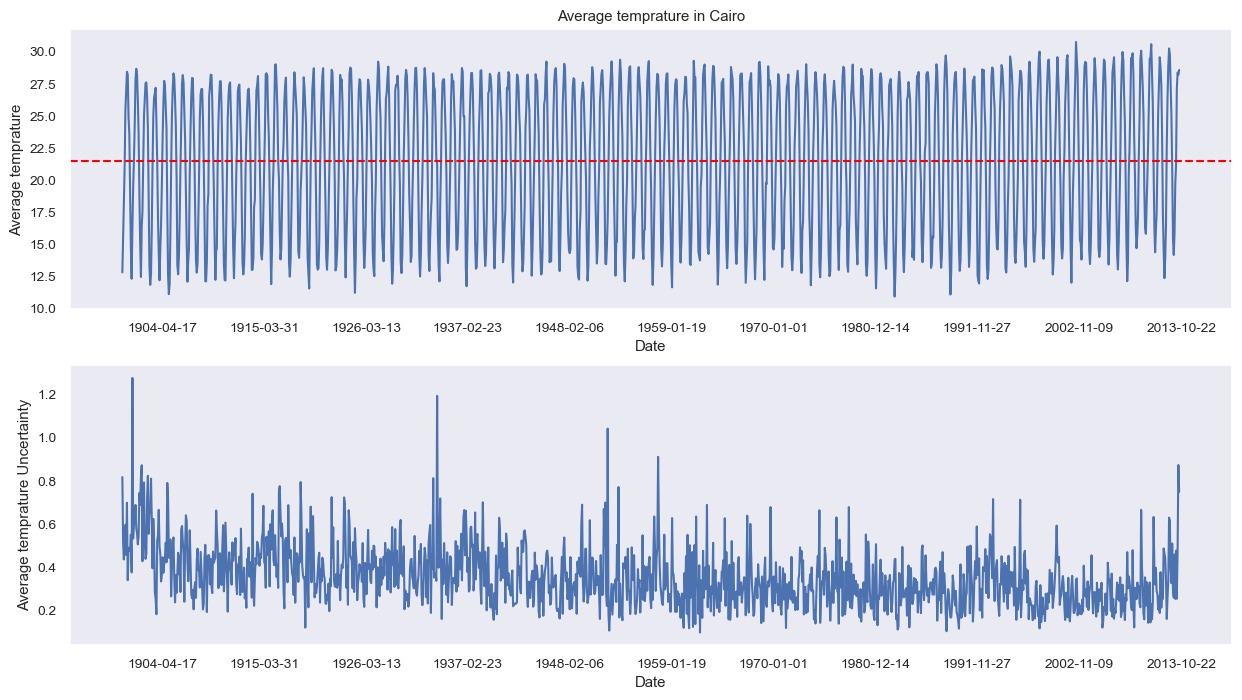

In [49]:
fig , ax = plt.subplots(2,figsize=(15,8))
ax[0].plot(cairo["dt"] ,cairo["AverageTemperature"])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(12))
ax[0].axhline(y = cairo["AverageTemperature"].mean() , color="red" , linestyle="--")
ax[0].set_title("Average temprature in Cairo")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Average temprature")
ax[0].grid()

ax[1].plot(cairo["dt"] ,cairo["AverageTemperatureUncertainty"])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(12))
#ax[0].axhline(y = alex["AverageTemperatureUncertainty"].mean() , color="red" , linestyle="--")

ax[1].set_xlabel("Date")
ax[1].set_ylabel("Average temprature Uncertainty")
ax[1].grid()

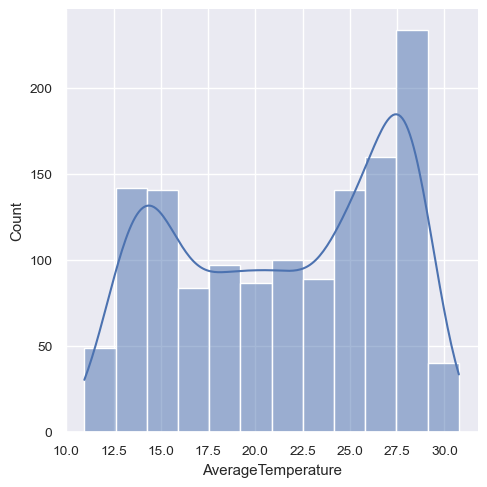

In [50]:
sns.displot(cairo["AverageTemperature"] , kde=True)

In [51]:
temp = cairo.groupby(["Month"]).mean()
temp.drop(columns=["AverageTemperatureUncertainty"] , axis=1 , inplace=True)
temp = temp.sort_values(["AverageTemperature"])

Text(0.5, 1.0, 'Average Temprature per Month in Cairo')

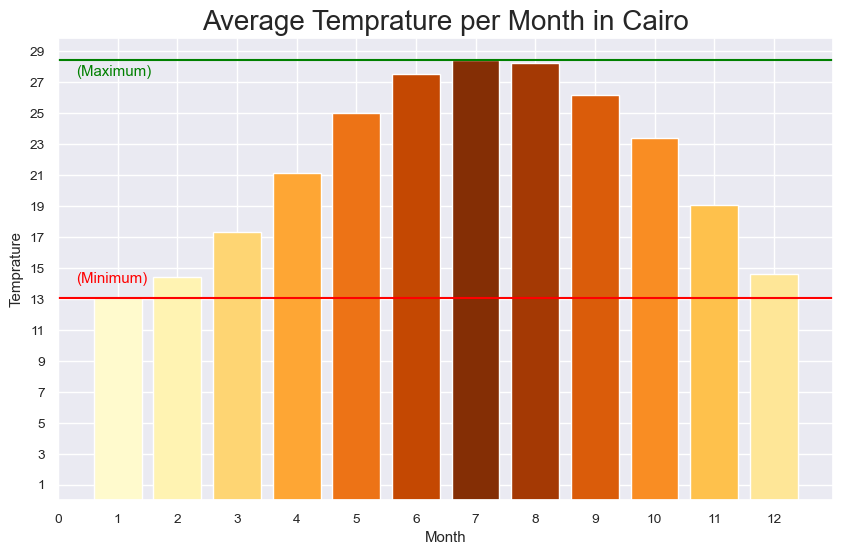

In [52]:
plt.figure(figsize=(10,6))
plt.bar(temp.index , temp["AverageTemperature"].values , color=sns.color_palette("YlOrBr",len(temp.index) ))

plt.axhline(y=temp["AverageTemperature"].values.min() , color="red")
plt.text(.3,temp["AverageTemperature"].values.min()+1 , "(Minimum)" , color='red')
plt.axhline(y=temp["AverageTemperature"].values.max() , color="green")
plt.text(.3,temp["AverageTemperature"].values.max()-1 , "(Maximum)" , color='green')

xticks = plt.xticks(range(13))
yticks = plt.yticks(np.arange(1 , 30 ,2))
plt.xlabel("Month")
plt.ylabel("Temprature")
plt.title("Average Temprature per Month in Cairo" , fontsize=20)

In [53]:
temps_df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [54]:
temps_df.shape

(577462, 4)

In [55]:
temps_df.head()


dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [56]:
temps_df.AverageTemperature.describe()

count    544811.000000
mean         17.193354
std          10.953966
min         -37.658000
25%          10.025000
50%          20.901000
75%          25.814000
max          38.842000
Name: AverageTemperature, dtype: float64

In [57]:
temps_df[pd.isnull(temps_df.AverageTemperature)]

dt  AverageTemperature  AverageTemperatureUncertainty  \
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
9       1744-08-01                 NaN                            NaN   
...            ...                 ...                            ...   
575800  1875-04-01                 NaN                            NaN   
575852  1879-08-01                 NaN                            NaN   
575853  1879-09-01                 NaN                            NaN   
575854  1879-10-01                 NaN                            NaN   
577461  2013-09-01                 NaN                            NaN   

         Country  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
9          Åland  
...          ...  
575800  Zimbabwe  
575852  Zimbabwe  
575853  Zimbabwe  
575854  Zimbabwe  
577461  Zimbabwe  

[32651 rows x 4 columns]

In [58]:
temps_clean_df = temps_df.dropna()


In [59]:
temps_clean_df[pd.isnull(temps_clean_df.AverageTemperature)]

Empty DataFrame
Columns: [dt, AverageTemperature, AverageTemperatureUncertainty, Country]
Index: []

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [60]:
temps_clean_df = temps_clean_df.copy()
temps_clean_df['dt'] = pd.to_datetime(temps_clean_df['dt'])
temps_clean_df['Year'] = temps_clean_df['dt'].dt.year

In [61]:
X = temps_clean_df[['Year']]
y = temps_clean_df['AverageTemperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [63]:
last_year = temps_clean_df['Year'].max()
years_ahead = [last_year + 50, last_year + 100, last_year + 200, last_year + 500]
future_years = pd.DataFrame({'Year': years_ahead})

predicted_temperatures = model.predict(future_years)

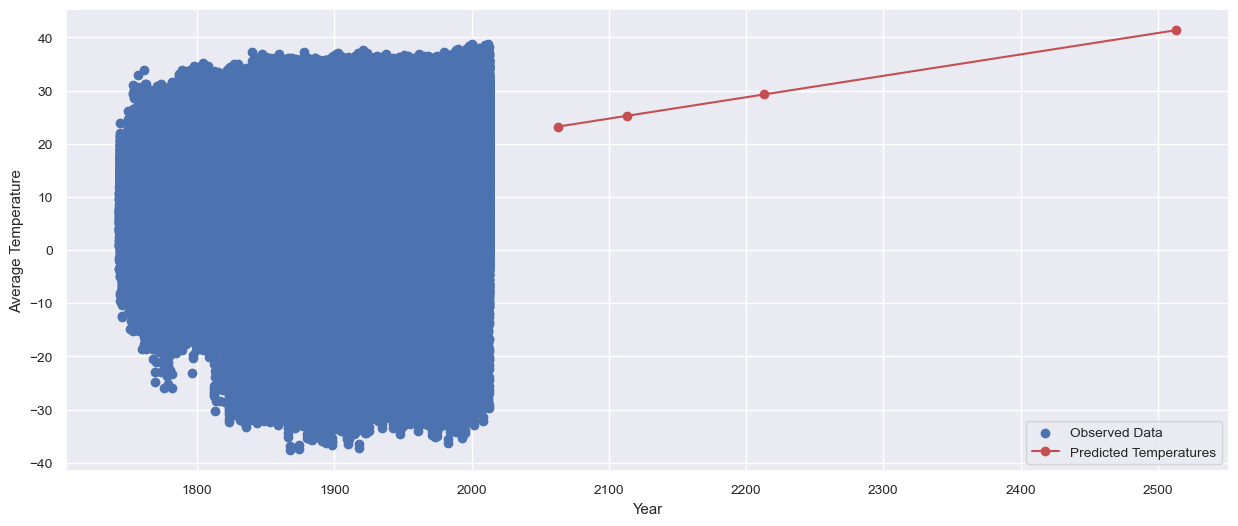

In [64]:
plt.figure(figsize=(15, 6))
plt.scatter(temps_clean_df['Year'], temps_clean_df['AverageTemperature'], label='Observed Data')
plt.plot(future_years['Year'], predicted_temperatures, 'ro-', label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [66]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)


Mean Squared Error: 113.52846169058924
Root Mean Squared Error: 10.654973565926348
Mean Absolute Error: 8.554074444204808
R-squared score: 0.05628698363537432


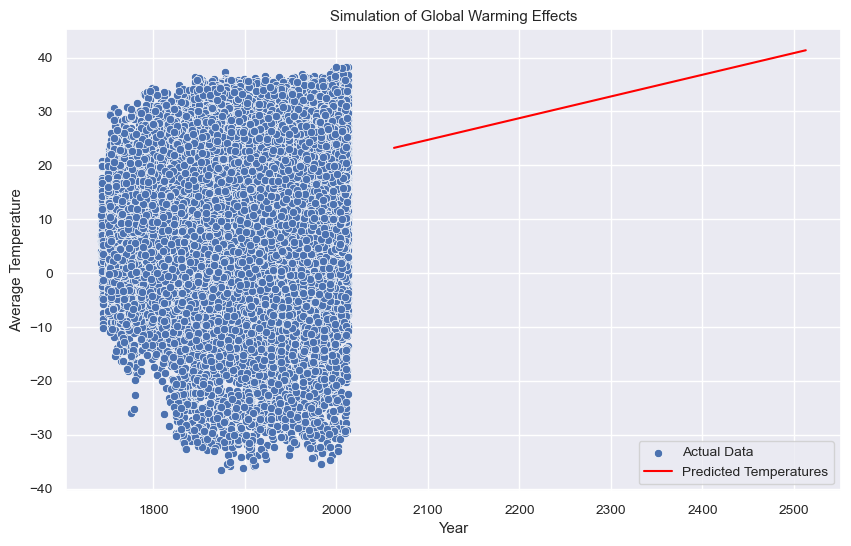

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Year'], y=y_test, label='Actual Data')
sns.lineplot(x=future_years['Year'], y=predicted_temperatures, color='red', label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [69]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'alpha': [0.87, 0.095, 0.0117],
    'l1_ratio': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(ElasticNet(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

Best alpha: 0.0117
Best l1_ratio: 1.0


In [71]:
# Train the ElasticNet model with the best hyperparameters
model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=1000)
model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.0117, l1_ratio=1.0)

In [72]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 113.52890561178339
R-squared score: 0.05628329351042305


In [73]:
# Predict future temperatures at 50-year intervals up to 2200
future_years = pd.DataFrame({'Year': np.arange(1750, 3000, 50)})
future_years_scaled = scaler.transform(future_years)
predicted_temperatures = model.predict(future_years_scaled)


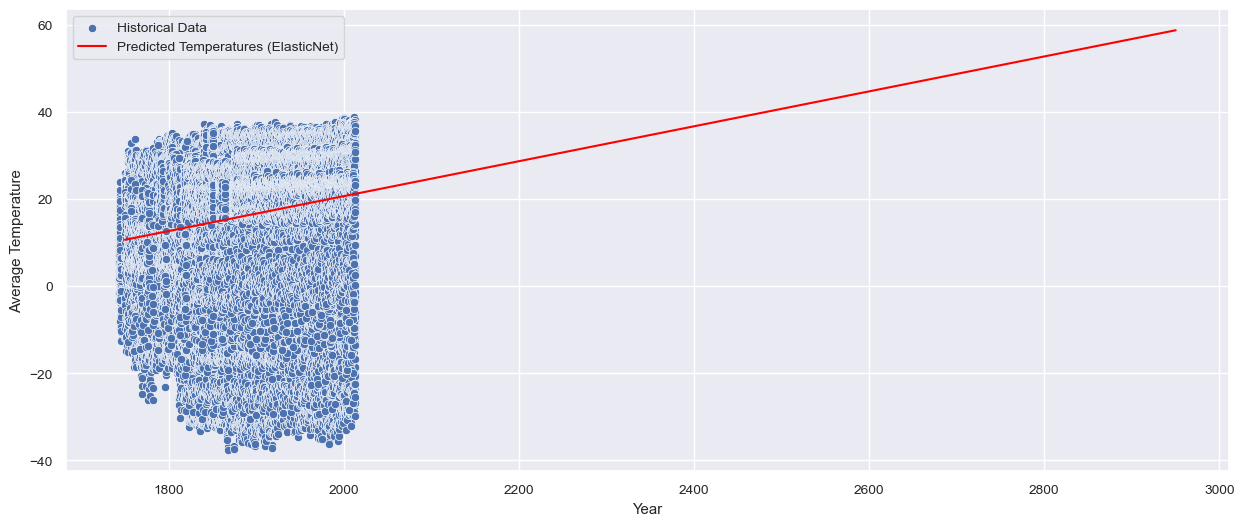

In [74]:
# Visualization
plt.figure(figsize=(15, 6))
sns.scatterplot(x=X['Year'], y=y, label='Historical Data')
sns.lineplot(x=future_years['Year'], y=predicted_temperatures, color='red', label='Predicted Temperatures (ElasticNet)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

# **The Possible Outcome of this Simulation?**

Human Health: Higher temperatures can lead to heat-related illnesses and fatalities. The increased frequency and intensity of heatwaves would pose a significant risk to vulnerable populations, including the elderly, children, and those with pre-existing health conditions.

Ecosystem Disruption: Many ecosystems and species are adapted to specific temperature ranges. A sudden and extreme increase in temperature could disrupt these ecosystems, leading to species extinction, loss of biodiversity, and imbalances in natural food chains.

Agriculture and Food Security: Extreme temperatures can negatively impact agricultural productivity. Crops may fail, leading to food shortages and price spikes. This, in turn, could exacerbate hunger and poverty in many regions.

Water Resources: Higher temperatures can lead to increased evaporation, causing droughts and affecting water availability. This would further strain water resources for human consumption, agriculture, and industry.

Sea Level Rise: Rising global temperatures contribute to the melting of polar ice caps and glaciers. This would lead to a significant increase in sea levels, threatening coastal areas and displacing millions of people living in low-lying regions.

Extreme Weather Events: More heat in the atmosphere can fuel extreme weather events, such as hurricanes, typhoons, and intense storms. These events can cause widespread destruction and loss of life.

Ocean Acidification: Warmer temperatures can also contribute to ocean acidification, which poses a significant threat to marine life, especially coral reefs and shell-forming organisms.

Disruption of Global Climate Patterns: Such a drastic change in temperature could lead to unpredictable shifts in climate patterns, potentially disrupting monsoons, weather cycles, and regional climates, with far-reaching consequences.

In [75]:
from sklearn.metrics import classification_report

In [76]:
def compute_classification_report(y_true, y_pred):
  target_names = ['No', 'Yes']
  print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

In [77]:
print('Accuracy: ', model.score(X, y))

Accuracy:  -203204.0414131055


In [78]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

# Accuracy
print('Train score: ', xgb.score(X_train, y_train))
print('Test score: ', xgb.score(y_train, y_test))

Train score:  0.07626943114272988


ValueError: feature_names mismatch: ['Year'] ['AverageTemperature']
expected Year in input data
training data did not have the following fields: AverageTemperature